## Bonus vs Roll

Expertise bonus determination:
1 year +1
5 yrs +5
10 yrs +10
11 yrs +11
30 yrs +13
90 yrs +19
100 yrs +20
200 yrs +22
300 yrs +23
1000 yrs +30


A formal way to think about this is:
Deterministic bonus
Dice Expected outcome
Dice variance or 75% percentile

Here is a table for a D&D low level character for an expert proficiency role.
7 & 10.5 & 5

Same for a high level D&D character:
16 & 10.5 & 5


## Initialization

In [1]:
import math
import numpy as np
import pandas as pd
import random
import re
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def fct(x):
    return math.factorial(x)

In [3]:
class Dice:
    definition_format = re.compile('[1-9][0-9]*d[1-9][0-9]*')
    
    @classmethod
    def _parse_definition(cls, definition):
        if not cls.definition_format.match(definition):
            raise ValueError
        dice_params = definition.split('d')
        dice_pool = int(dice_params[0])
        dice_side = int(dice_params[1])
        
        return dice_pool, dice_side
    
    def __init__(self, definition=None):
        if definition is not None:
            self.dice_pool, self.dice_side = self._parse_definition(definition)
    
    def __enter__(self):
        return self
    
    def __exit__(self, exc_type, exc_value, exc_traceback):
        pass
    
    @staticmethod
    def roll(dice_pool, dice_side):
            
        return np.random.randint(1, high=dice_side + 1, size=dice_pool)
    
    def __call__(self, definition=None):
        if definition is not None:
            dice_pool, dice_side = self._parse_definition(definition)
        else:
            dice_pool, dice_side = self.dice_pool, self.dice_side
        return self.roll(dice_pool, dice_side)
    

In [4]:
with Dice('2d6') as roll:
    display(roll())

array([2, 1])

In [61]:
class d:
    class Roll:
        def __init__(self, result: np.ndarray):
            if not isinstance(result, np.ndarray) or len(result.shape) > 2:
                raise TypeError
            self.result = result
            if len(result.shape) == 1:
                self.len = len(result)
            else:
                self.len = result.shape[0]
            
        @property
        def shape(self):
            return self.result.shape
        
        def dice_count(self):
            if len(self.result.shape) == 2:
                return self.result.shape[0]
            else:
                return 1
        
        def __len__(self):
            if len(result.shape) == 1:
                return self.len(self.len)
            else:
                return TypeError
            
        def __repr__(self):
            return str(self.result)
        
        def __add__(self, other: int):
            if isinstance(other, int):
                return self.__class__(self.result + np.array([other]))
            elif isinstance(other, self.__class__):
                if len(self.result.shape) != len(other.result.shape):
                    raise ValueError
                if len(self.result.shape) <= 2:
                    return self.__class__(np.concatenate([self.result, other.result]))
                else:
                    raise ValueError
            else:
                return NotImplemented
            
        def __eq__(self, other: int):
            # Raise error for 2d arrays
            return self.result == other

        def __gt__(self, other: int):
            return self.result > other

        def __ge__(self, other: int):
            return self.result >= other

        def __lt__(self, other: int):
            return self.result < other

        def __le__(self, other: int):
            return self.result <= other
        
        def max(self):
            return self.sum().max()
        
        def min(self):
            return self.sum().min()
        
        def sum(self):
            if len(self.result.shape) == 1:
                return self.result.sum()
            elif len(self.result.shape) == 2:
                return self.result.sum(axis=0)
        
    def _roll(self, n=1, k=1):
        return np.random.randint(1, high=self.sides + 1, size=(k, n))
    
    def __init__(self, sides: int):
        self.sides = sides
        
    def __len__(self):
        return self.sides
        
    def max(self):
        return self.sides
    
    def min(self):
        return 1
        
    def range(self):
        return (1, self.sides)
    
    def expected(self):
        return (self.sides + 1) / 2
        
    def __rmul__(self, other):
        if isinstance(other, int):
            return self.__class__.Roll(np.array(self._roll(n=other)[0]))
        elif isinstance(other, tuple):
            return self.__class__.Roll(np.matrix(self._roll(n=other[0], k=other[1])))
        else:
            return NotImplemented

    def __enter__(self):
        return self
    
    def __exit__(self, exc_type, exc_value, exc_traceback):
        pass
    
    def __repr__(self):
        return f'd{self.sides}'
    



In [45]:
with d(6) as d6:
    display(d6._roll())
    display(4*d6)
    display(4*d6 + 2)
    assert 1 <= 1*d6 <= 6
    assert 3 <= 1*d6 + 2 <= 8
    display(4*d6 == 6)
    assert (4*d6 <= 24).all()
    display(4*d6 >= 3)
    display((2, 4)*d6)
with d(20) as d20:
    display(2*d20)
with d(4) as d4, d(6) as d6:
    display(1*d6 + 2*d4)
    assert (1*d6 + 2*d4).sum() <= 14
    display(((3, 1)*d6 + (3, 2)*d4))
    display((((3, 1)*d6 + (3, 2)*d4)).sum())
    assert ((((3, 1)*d6 + (3, 2)*d4)).sum() <= 14).all()
    

array([[6]])

[1 2 2 3]

[7 7 8 7]

array([False, False, False,  True])

array([ True,  True,  True, False])

[[5 3]
 [6 6]
 [5 3]
 [5 1]]

[13 14]

[3 2 4]

[[5 5 3]
 [2 3 1]
 [2 4 4]]

matrix([[10,  6,  5]])

## Analysis

In [46]:

d4 = d(4)
d6 = d(6)
d8 = d(8)
d10 = d(10)
d12 = d(12)
d20 = d(20)


In [47]:
k = int(1e5)


In [100]:
rolls = [
    ('1d20',               (k, 1) * d20),
    ('1d4',                (k, 1) * d4),
    ('1d6',                (k, 1) * d6),
    ('1d8',                (k, 1) * d8),
    ('2d4',                (k, 2) * d4),
    ('1d4 + 1d6',          (k, 1) * d4 + (k, 1) * d6),
    ('1d10',               (k, 1) * d10),
    ('2d6',                (k, 2) * d6),
    ('1d12',               (k, 1) * d12),
    ('1d4 + 1d8',          (k, 1) * d4 + (k, 1) * d8),
    ('1d6 + 1d8',          (k, 1) * d6 + (k, 1) * d8),
    ('1d4 + 1d10',         (k, 1) * d4 + (k, 1) * d10),
    ('2d8',                (k, 2) * d8),
    ('1d6 + 1d10',         (k, 1) * d6 + (k, 1) * d10),
    ('1d8 + 1d10',         (k, 1) * d8 + (k, 1) * d10),
    ('3d4',                (k, 3) * d4),
    ('2d4 + 1d6',          (k, 2) * d4 + (k, 1) * d6),
    ('1d4 + 2d6',          (k, 1) * d4 + (k, 2) * d6),
    ('2d4 + 1d8',          (k, 2) * d4 + (k, 1) * d8),
    ('1d4 + 1d6 + 1d8',    (k, 1) * d4 + (k, 1) * d6 + (k, 1) * d8),
    ('3d6',                (k, 3) * d6),
    ('1d4 + 1d6 + 1d10',   (k, 1) * d4 + (k, 1) * d6 + (k, 1) * d10),
    ('1d4 + 2d8',          (k, 1) * d4 + (k, 2) * d8),
    ('2d6 + 1d8',          (k, 2) * d6 + (k, 1) * d8),
    ('1d4 + 1d8 + 1d10',   (k, 1) * d4 + (k, 1) * d8 + (k, 1) * d10),
    ('1d6 + 2d8',          (k, 1) * d6 + (k, 2) * d8),
    ('1d6 + 1d8 + 1d10',   (k, 1) * d6 + (k, 1) * d8 + (k, 1) * d10),
    ('3d8',                (k, 3) * d8),
    ('2d8 + 1d10',         (k, 2) * d8 + (k, 1) * d10),
    ('1d8 + 2d10',         (k, 1) * d8 + (k, 2) * d10),
    ('3d10',               (k, 3) * d10),
]


In [109]:
# list(enumerate(rolls))

In [111]:
max_difficulty = 30
min_difficulty = 1

M = np.zeros((len(rolls), max_difficulty - min_difficulty + 1))
S = np.zeros((len(rolls), k))
D1 = np.zeros((len(rolls), 1))
difficulty_levels = list(range(min_difficulty, max_difficulty + 1))
rows = []
for i, (label, roll) in enumerate(rolls):
    R = roll
    S[i] = R.sum()
#     print(S[i], R.max())
    for j, difficulty in enumerate(difficulty_levels):
        wins = (R.sum() > difficulty).sum().sum()
        ones = (R == 1)
        double_ones = (R == 1).sum(axis=0) >= 2
        pʹ = wins / k
        M[i, j] = wins / k
    D1[i, 0] = double_ones.sum() / k
    percentile = {}
    for ptl in [.25, .75]:
        percentile[ptl] = (M[i] >= ptl).sum() + min_difficulty
    rows.append({
        'roll': label, 
        'p(80)': (M[i] >= .8).sum() + min_difficulty, 
        'expected': ((roll.max() + roll.min()) / 2),
        'p(20)': (M[i] >= .2).sum() + min_difficulty,
        'double-1': D1[i][0],
        'Chance Ratio': 
    })
df = pd.DataFrame(rows)
df

,roll,p(80),expected,p(20),double-1
0,1d20,5,10.5,17,0.00000
1,1d4,1,2.5,4,0.00000
2,1d6,2,3.5,5,0.00000
3,1d8,2,4.5,7,0.00000
4,2d4,4,5.0,6,0.06095
5,1d4 + 1d6,4,6.0,8,0.04085
6,1d10,3,5.5,8,0.00000
7,2d6,5,7.0,9,0.02783
8,1d12,3,6.5,10,0.00000
9,1d4 + 1d8,5,7.0,9,0.03050


In [114]:
outcomes = pd.DataFrame(S).set_index(df['roll'])
# outcomes

[Text(0, 0, '1d20'),
 Text(1, 0, '1d4'),
 Text(2, 0, '1d6'),
 Text(3, 0, '1d8'),
 Text(4, 0, '2d4'),
 Text(5, 0, '1d4 + 1d6'),
 Text(6, 0, '1d10'),
 Text(7, 0, '2d6'),
 Text(8, 0, '1d12'),
 Text(9, 0, '1d4 + 1d8'),
 Text(10, 0, '1d6 + 1d8'),
 Text(11, 0, '1d4 + 1d10'),
 Text(12, 0, '2d8'),
 Text(13, 0, '1d6 + 1d10'),
 Text(14, 0, '1d8 + 1d10'),
 Text(15, 0, '3d4'),
 Text(16, 0, '2d4 + 1d6'),
 Text(17, 0, '1d4 + 2d6'),
 Text(18, 0, '2d4 + 1d8'),
 Text(19, 0, '1d4 + 1d6 + 1d8'),
 Text(20, 0, '3d6'),
 Text(21, 0, '1d4 + 1d6 + 1d10'),
 Text(22, 0, '1d4 + 2d8'),
 Text(23, 0, '2d6 + 1d8'),
 Text(24, 0, '1d4 + 1d8 + 1d10'),
 Text(25, 0, '1d6 + 2d8'),
 Text(26, 0, '1d6 + 1d8 + 1d10'),
 Text(27, 0, '3d8'),
 Text(28, 0, '2d8 + 1d10'),
 Text(29, 0, '1d8 + 2d10'),
 Text(30, 0, '3d10')]

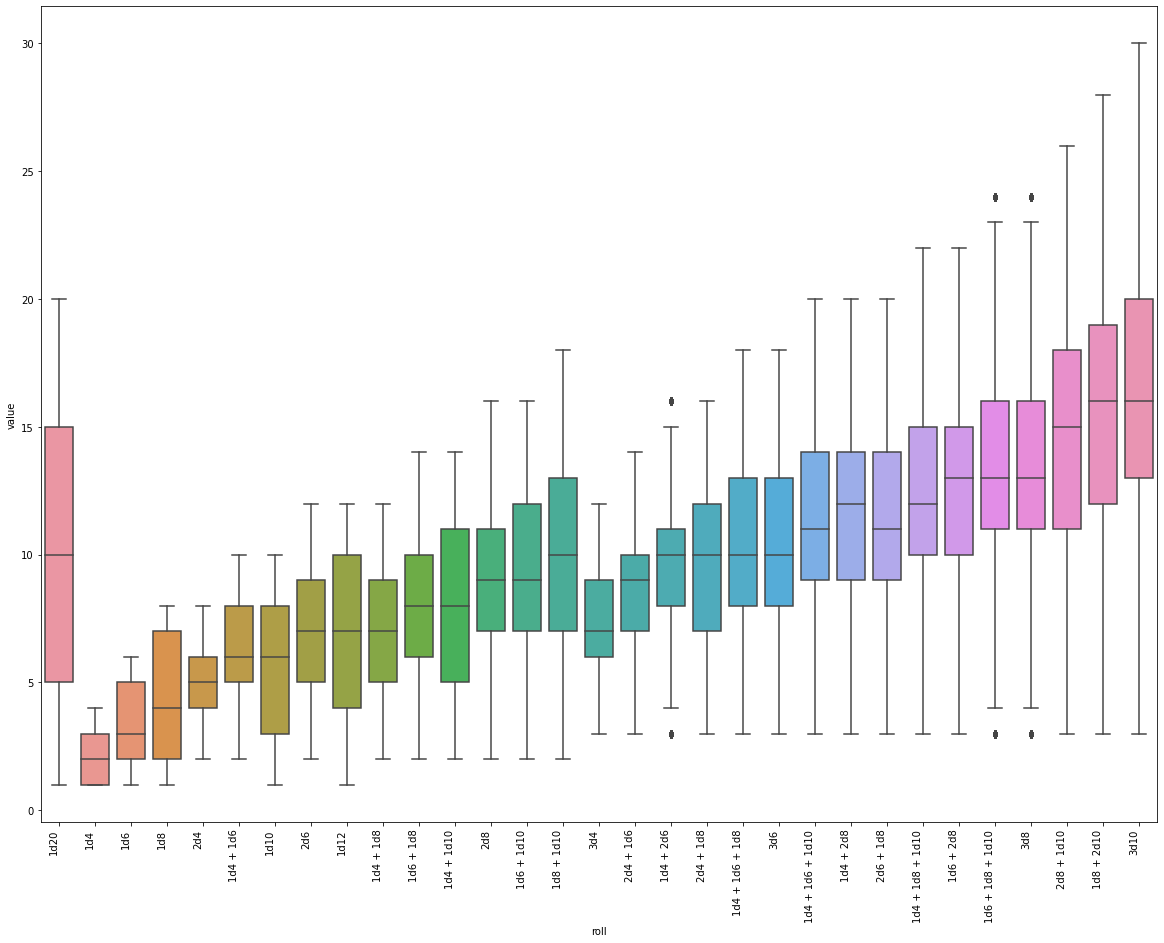

In [118]:
fig = plt.figure(figsize=[20,15])
ax = fig.subplots()
sns.boxplot(data=outcomes.T.melt(), x='roll', y='value', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

## Bonus Calculation

### Natural Bonus (Nature)

### Expertise - (Nurture)